In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from random import randrange
from random import seed
from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
url = 'https://raw.githubusercontent.com/ompatra/aqi/master/colab.csv'
df = pd.read_csv(url) 
df.head()

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
0,1.0,1.237227e+14,54.0,8.797196e+13,1.672758e+14,1.921680e+08,1.921680e+09,6.0,40.0,0.0,49279.0,80.0,-99.0,0.0
1,2.0,1.237227e+14,62.0,8.797196e+13,1.672758e+14,1.921680e+08,1.921680e+09,6.0,48.0,0.0,56521.0,80.0,-99.0,0.0
2,3.0,1.237227e+14,62.0,1.672758e+14,8.797196e+13,1.921680e+09,1.921680e+08,6.0,48.0,0.0,80.0,56521.0,-99.0,0.0
3,4.0,1.237227e+14,54.0,1.672758e+14,8.797196e+13,1.921680e+09,1.921680e+08,6.0,40.0,0.0,80.0,49279.0,-99.0,0.0
4,5.0,1.237227e+14,54.0,8.797196e+13,1.672758e+14,1.921680e+08,1.921680e+09,6.0,40.0,0.0,56521.0,80.0,-99.0,0.0


In [ ]:
df["normality"].value_counts()

5.0    200
4.0    200
3.0    200
2.0    200
0.0    179
1.0     21
Name: normality, dtype: int64

In [ ]:
#sns.pairplot(df.drop("frame.number", axis=1), hue="normality", size=5)

In [ ]:
x = df.iloc[:,0:13].values
y = df.iloc[:,13].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.437191,-1.011925,-0.608676,-0.887545,0.633828,-0.813000,0.972902,1.162120,-0.395552,-0.543995,1.209135,-0.302136,-2.077950
1,-1.437140,-1.011925,-0.494513,-0.887545,0.633828,-0.813000,0.972902,1.162120,-0.294945,-0.543995,1.485652,-0.302136,-2.077950
2,-1.437089,-1.011925,-0.494513,0.430336,-1.569750,1.024473,-0.857428,1.162120,-0.294945,-0.543995,-0.669404,3.260185,-2.077950
3,-1.437038,-1.011925,-0.608676,0.430336,-1.569750,1.024473,-0.857428,1.162120,-0.395552,-0.543995,-0.669404,2.803100,-2.077950
4,-1.436988,-1.011907,-0.608676,-0.887545,0.633828,-0.813000,0.972902,1.162120,-0.395552,-0.543995,1.485652,-0.302136,-2.077950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.317098,0.816360,-0.779921,0.430336,-1.569750,-1.017164,-1.060799,-0.991093,-0.898592,-0.543995,-0.672458,-0.307185,0.370957
996,3.745292,6.424637,-0.779921,0.430336,-1.569750,-1.017164,-1.060799,-0.991093,-0.898592,-0.543995,-0.672458,-0.307185,0.370957
997,1.402417,0.879954,-0.779921,0.430336,-1.569750,-1.017164,-1.060799,-0.991093,-0.898592,-0.543995,-0.672458,-0.307185,0.370957
998,1.067968,0.640492,-0.779921,0.430336,-1.569750,-1.017164,-1.060799,-0.991093,-0.898592,-0.543995,-0.672458,-0.307185,0.370957


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x)
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.457287,-2.679208,-1.416094,-1.142317,1.732063,-0.051106,0.450299,-0.009192,-0.087484,-0.027661,-0.113154,0.082772,0.001781
1,0.633435,-2.672708,-1.472005,-1.071382,1.859624,-0.074799,0.381999,-0.029958,-0.086057,-0.015899,0.048656,-0.027343,-0.001611
2,-0.002967,-3.535169,3.361900,-0.701126,-0.343980,0.236496,-0.568275,0.315898,0.071393,-0.032999,0.035015,-0.015807,-0.001716
3,-0.114405,-3.392189,3.123923,-0.779847,-0.222956,0.079016,-0.505646,0.205909,0.181302,0.148960,-0.153749,-0.005741,-0.002677
4,0.546887,-2.688425,-1.480328,-1.125836,1.888756,-0.084349,0.312128,-0.035678,-0.128050,-0.012921,-0.015008,-0.000915,0.000605


In [ ]:
variance = pca.explained_variance_ratio_
variance

array([4.13969011e-01, 2.28875415e-01, 1.61635415e-01, 8.40243408e-02,
       6.57278186e-02, 2.51084705e-02, 1.01731672e-02, 5.13526177e-03,
       3.71171626e-03, 1.44202159e-03, 1.26150970e-04, 7.11474439e-05,
       6.47953459e-08])

0.413969011,0.228875415,0.161635415,0.084024341,0.065727819,0.025108471, 
0.010173167, 0.005135262, 0.003711716, 0.001442022, 0.000126151, 7.11474E-05,
6.47953E-08


In [ ]:
x_train


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.457287,-2.679208,-1.416094,-1.142317,1.732063,-0.051106,0.450299,-0.009192,-0.087484,-0.027661,-0.113154,0.082772,0.001781
1,0.633435,-2.672708,-1.472005,-1.071382,1.859624,-0.074799,0.381999,-0.029958,-0.086057,-0.015899,0.048656,-0.027343,-0.001611
2,-0.002967,-3.535169,3.361900,-0.701126,-0.343980,0.236496,-0.568275,0.315898,0.071393,-0.032999,0.035015,-0.015807,-0.001716
3,-0.114405,-3.392189,3.123923,-0.779847,-0.222956,0.079016,-0.505646,0.205909,0.181302,0.148960,-0.153749,-0.005741,-0.002677
4,0.546887,-2.688425,-1.480328,-1.125836,1.888756,-0.084349,0.312128,-0.035678,-0.128050,-0.012921,-0.015008,-0.000915,0.000605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.510296,1.362945,1.144626,0.508336,0.659823,-0.584320,0.019229,-0.149048,0.076701,-0.234923,-0.014079,-0.009765,-0.000060
996,-3.158710,5.342224,2.571510,0.514940,2.882701,3.003310,0.346320,0.659888,-0.289075,0.356381,0.007627,0.004551,0.000028
997,-2.521493,1.439492,1.169538,0.506386,0.694012,-0.536194,0.017547,-0.160879,0.086195,-0.266297,-0.016825,-0.011842,-0.000067
998,-2.478452,1.144086,1.073738,0.514192,0.563225,-0.719113,0.025109,-0.111540,0.047331,-0.139472,-0.005801,-0.003508,-0.000039


In [ ]:
x_train['target']=y
x_train.columns = ['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport', 'Value', 'target']
x_train.head()

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,target
0,0.457287,-2.679208,-1.416094,-1.142317,1.732063,-0.051106,0.450299,-0.009192,-0.087484,-0.027661,-0.113154,0.082772,0.001781,0.0
1,0.633435,-2.672708,-1.472005,-1.071382,1.859624,-0.074799,0.381999,-0.029958,-0.086057,-0.015899,0.048656,-0.027343,-0.001611,0.0
2,-0.002967,-3.535169,3.361900,-0.701126,-0.343980,0.236496,-0.568275,0.315898,0.071393,-0.032999,0.035015,-0.015807,-0.001716,0.0
3,-0.114405,-3.392189,3.123923,-0.779847,-0.222956,0.079016,-0.505646,0.205909,0.181302,0.148960,-0.153749,-0.005741,-0.002677,0.0
4,0.546887,-2.688425,-1.480328,-1.125836,1.888756,-0.084349,0.312128,-0.035678,-0.128050,-0.012921,-0.015008,-0.000915,0.000605,0.0


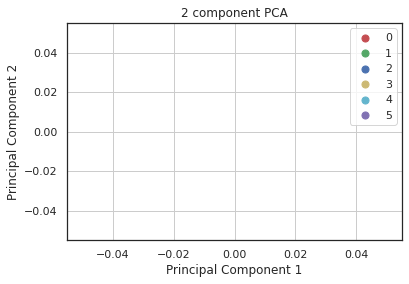

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
label = fig.add_subplot(1,1,1) 
label.set_xlabel('Principal Component 1') 
label.set_ylabel('Principal Component 2') 
label.set_title('2 component PCA') 
targets = ['0', '1', '2','3','4', '5']
colors = ['r', 'g', 'b', 'y', 'c','m']
for target, color in zip(targets,colors):
 indicesToKeep = x_train['target'] == target
 label.scatter(x_train.loc[indicesToKeep, 'frame.number']
 , x_train.loc[indicesToKeep, 'frame.time']
 , c = color
 , s = 50)
label.legend(targets)
label.grid()